In [1]:
%pip install seaborn --quiet
%pip install scipy --quiet
%pip install statsmodels --quiet
%pip install pymssql --quiet
# !pip install plotly --quiet
!pip install datetime --quiet
# !pip install prophet --quiet
!pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")
import re

# import matplotlib.pyplot as plt

# %matplotlib inline
import pymssql
import seaborn as sns

import datetime as dt
# import plotly.express as px
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# import plotly.io as pio
# pio.renderers.default = 'iframe'
from shuqing_price_data import *

# plt.style.use('fivethirtyeight')
# five_thirty_eight = [
#     "#30a2da",
#     "#fc4f30",
#     "#e5ae38",
#     "#6d904f",
#     "#8b8b8b",
# ]
# sns.set_palette(five_thirty_eight)
# import pickle
from bifrost.auth.drive import MSDrive
from io import StringIO

In [3]:
# # preprod credentials
# server = "we1oseeplxdqwka.ceas0akte0b1.eu-west-1.rds.amazonaws.com"
# user = "BPAIRDBA"
# database = "Air_PrePROD_W2"
# port = "1433"
# password = "ctUhxVEdGx$Jv528*M17lZ2zmYBXVP"

In [3]:
server = "we1qjpbflkzdsmp.ceas0akte0b1.eu-west-1.rds.amazonaws.com"
user = "BPAIRDBA"
database = "AirPROD"
port = "1433"
password = "m#aEHfQMWu8WO48"

In [18]:
sql_query = """ 
select * from

(SELECT 
PVG.PRICE_RECORD_ID, 
PVG.PRICE_ITEM_ID, PVG.APPROVED_AT, 

-- Salesforce dimensions
PVG.BAND_PRICE, PVG.BAND_PRICE_DESC, 
PVG.TENDER, PVG.TENDER_DESC, 
PVG.CUSTOMER_GRN, PVG.CUSTOMER_GRN_DESC, 
PVG.LOCATION, PVG.LOCATION_DESC, 
PVG.DELIVERY_POINT, PVG.DELIVERY_POINT_DESC, 
PVG.PRODUCT_CODE, PVG.PRODUCT_CODE_DESC,

--SAP dimensions

PVG.SALES_ORG, PVG.SALES_ORG_DESC, PVG.SUPPLY_LOC, PVG.SUPPLY_LOC_DESC, PVG.SHIPPING_POINT, PVG.SHIPPING_POINT_DESC, 
PVG.BILL_TO, PVG.BILL_TO_DESC, PVG.SOLD_TO, PVG.SOLD_TO_DESC, PVG.SHIP_TO, PVG.SHIP_TO_DESC,
PVG.PRODUCT_HIERARCHY_PA, PVG.PRODUCT_HIERARCHY_PA_DESC, 
PVG.PRODUCT, PVG.PRODUCT_DESC,

PVG.INDEX_CODE, PVG.INDEX_CODE_DESC, 
PVG.INDEX_CODE_REF, PVG.INDEX_CODE_REF_DESC, 
PVG.START_DATE,  PVG.END_DATE, PVG.CURRENCY_CODE, PVG.UOM_CODE,
PVG.COUNTRY_NAME,

ISNULL([Price Basis], '0.0') AS PRICE_BASIS,   
ISNULL([Diff1], '0.0') AS DIFF1,  
ISNULL([Diff2], '0.0') AS DIFF2,     
ISNULL([Diff3], '0.0') AS DIFF3, 
ISNULL([Diff4], '0.0') AS DIFF4,  
ISNULL([Discount], '0.0') AS DISCOUNT, 
ISNULL([Price Decimal],6) AS PRICE_DECIMAL, 
[Net Price] as NET_PRICE,

--ISNULL([Price Basis],0) AS PRICE_BASIS,   ISNULL([Diff1],0.0) AS DIFF1,  ISNULL([Diff2],0.0) AS DIFF2,     ISNULL([Diff3],0.0) AS DIFF3,   ISNULL([Discount],0.0) AS DISCOUNT, ISNULL([Price Decimal],6) AS PRICE_DECIMAL,

[Index Value Raw] as INDEX_VALUE_RAW, [Index Value Raw Previous] as INDEX_VALUE_RAW_PREVIOUS,
[Fixed Price Negotiated] as FIXED_PRICE_NEGOTIATED,
[Diff1 Negotiated] as DIFF1_NEGOTIATED,
[Diff2 Negotiated] as DIFF2_NEGOTIATED,
[Diff3 Negotiated] as DIFF3_NEGOTIATED,
[Diff4 Negotiated] as DIFF4_NEGOTIATED,
[Discount Negotiated] as DISCOUNT_NEGOTIATED,
[Fixed Price FX] as FX_FIXED_PRICE_RATE,
[Index FX] as FX_INDEX_RATE,
[Diff1 FX] as FX_DIFF1_RATE,
[Diff2 FX] as FX_DIFF2_RATE,
[Diff3 FX] as FX_DIFF3_RATE,
[Diff4 FX] as FX_DIFF4_RATE,
[Discount FX] as FX_DISCOUNT_RATE,
[FX_Type_Index] AS FX_TYPE_INDEX,
[FX_Type_Diff1] AS FX_TYPE_DIFF1,
[FX_Type_Diff2] AS FX_TYPE_DIFF2,
[FX_Type_Diff3] AS FX_TYPE_DIFF3,
[FX_Type_Diff4] AS FX_TYPE_DIFF4,
[FX_Type_Discount] AS FX_TYPE_DISCOUNT,
[Fixed Price UOM] as FIXED_PRICE_UOM,
[Index UOM] as INDEX_UOM,
[Diff1 UOM] as DIFF1_UOM,
[Diff2 UOM] as DIFF2_UOM,
[Diff3 UOM] as DIFF3_UOM,
[Diff4 UOM] as DIFF4_UOM,
[Discount UOM] as DISCOUNT_UOM,
[Fixed Price Currency] as FIXED_PRICE_CURRENCY,
[Index Currency] as INDEX_CURRENCY,
[Diff1 Currency] as DIFF1_CURRENCY,
[Diff2 Currency] as DIFF2_CURRENCY,
[Diff3 Currency] as DIFF3_CURRENCY,
[Diff4 Currency] as DIFF4_CURRENCY,
[Discount Currency] as DISCOUNT_CURRENCY,
[Start_Date_Tender] AS CONTRACT_START,
[End_Date_Tender] AS CONTRACT_END,
[Start_Date_Index] AS INDEX_START,
[End_Date_Index] AS INDEX_END,
[Notification - Index Basis] as NOTIFICATION_INDEX_BASIS,
[Notification - Index Basis Previous] as NOTIFICATION_INDEX_BASIS_PREVIOUS,
[Notification - Index Basis Change] as NOTIFICATION_INDEX_BASIS_CHANGE,
[Notification - Negotiated Diff1] as NOTIFICATION_NEGOTIATED_DIFF1,
[Notification - Negotiated Diff2] as NOTIFICATION_NEGOTIATED_DIFF2,
[Notification - Negotiated Diff3] as NOTIFICATION_NEGOTIATED_DIFF3,
[Notification - Negotiated Diff4] as NOTIFICATION_NEGOTIATED_DIFF4,
[Notification - Negotiated Discount] as NOTIFICATION_NEGOTIATED_DISCOUNT,
[Notification - Price Diff] as NOTIFICATION_PRICE_DIFF,
[Notification - Index FX Rate] as NOTIFICATION_INDEX_FX_RATE,
[Notification - Diff1 FX Rate] as NOTIFICATION_DIFF1_FX_RATE,
[Notification - Diff2 FX Rate] as NOTIFICATION_DIFF2_FX_RATE,
[Notification - Diff3 FX Rate] as NOTIFICATION_DIFF3_FX_RATE,
[Notification - Diff4 FX Rate] as NOTIFICATION_DIFF4_FX_RATE,
[Notification - Discount FX Rate] as NOTIFICATION_DISCOUNT_FX_RATE

      FROM
        (select T.PRICE_RECORD_ID, T.COMPONENT_TYPE_CODE, T.COMPONENT_TYPE_NAME,
		T.PRICE_ITEM_ID, T.APPROVED_AT, 
        T.BAND_PRICE, T.BAND_PRICE_DESC,T.COUNTRY_NAME, T.TENDER, T.TENDER_DESC, T.CUSTOMER_GRN, T.CUSTOMER_GRN_DESC, T.LOCATION, T.LOCATION_DESC, T.DELIVERY_POINT, T.DELIVERY_POINT_DESC, T.PRODUCT_CODE, T.PRODUCT_CODE_DESC,
        T.SALES_ORG, T.SALES_ORG_DESC, T.SUPPLY_LOC, T.SUPPLY_LOC_DESC, T.SHIPPING_POINT, T.SHIPPING_POINT_DESC, T.BILL_TO, T.BILL_TO_DESC, T.SOLD_TO, T.SOLD_TO_DESC, T.SHIP_TO, T.SHIP_TO_DESC,
        T.PRODUCT_HIERARCHY_PA, T.PRODUCT_HIERARCHY_PA_DESC, T.PRODUCT, T.PRODUCT_DESC,
        T.INDEX_CODE, T.INDEX_CODE_DESC, T.INDEX_CODE_REF, T.INDEX_CODE_REF_DESC, T.START_DATE, T.END_DATE, T.CURRENCY_CODE, T.UOM_CODE,
		T.ELEMENT_NAME,  ISNULL(TRIM(STR(T.ELEMENT_VALUE,20,9)), T.ELEMENT_STRING_VALUE)  AS ELEMENT_VALUE  
		 from 
		 
		 PM_RPT_PRICE_LIST_NV_BP  T 

         where 


---****************************************************************	     
--- This is where you need to specify the filter to extract the prices		
---****************************************************************	

-- get the component type in which prices are calculated
-- P130 for the airbp contract prices
-- L00B for the airbp band prices
-- L00A for the airbn index code

T.COMPONENT_TYPE_CODE in ('L00B')


-- filter for the start date of the price
and T.START_DATE >='2022-01-01 00:00:00.000' and T.START_DATE<=GETDATE()



---****************************************************************		 
		 
----

and		 T.ELEMENT_NAME in ( 
		 -- pricing elements
		 'Price Basis',   'Diff1',   'Diff2',   'Diff3','Diff4', 'Discount','Price Decimal', 'Net Price',
		 'Index Value Raw', 'Index Value Raw Previous',
		 -- negotiated elements
		 'Fixed Price Negotiated', 'Diff1 Negotiated', 'Diff2 Negotiated', 'Diff3 Negotiated','Diff4 Negotiated', 'Discount Negotiated',
		 'Fixed Price UOM', 'Index UOM', 'Diff1 UOM', 'Diff2 UOM', 'Diff3 UOM','Diff4 UOM', 'Discount UOM', 
		 'Fixed Price Currency', 'Index Currency', 'Diff1 Currency', 'Diff2 Currency', 'Diff3 Currency','Diff4 Currency', 'Discount Currency',
		 'FX_Type_Index', 'FX_Type_Diff1', 'FX_Type_Diff2',  'FX_Type_Diff3','FX_Type_Diff4', 'FX_Type_Discount',  

		 -- exchange rates
		 'Fixed Price FX', 'Index FX', 'Diff1 FX', 'Diff2 FX', 'Diff3 FX', 'Diff4 FX','Discount FX',

		 --  start and date
		 'Start_Date_Tender', 'End_Date_Tender',
		 'Start_Date_Index', 'End_Date_Index',


		 -- notifications
		'Notification - Index Basis',
		'Notification - Index Basis Previous',
		'Notification - Index Basis Change',
		'Notification - Negotiated Diff1',
		'Notification - Negotiated Diff2',
		'Notification - Negotiated Diff3',
		'Notification - Negotiated Diff4',
		'Notification - Negotiated Discount',
		'Notification - Price Diff',
		'Notification - Index FX Rate',
		'Notification - Diff1 FX Rate',
		'Notification - Diff2 FX Rate',
		'Notification - Diff3 FX Rate',
		'Notification - Diff4 FX Rate',
		'Notification - Discount FX Rate'
		 
		 )
		 
	--	 and T.PRICE_RECORD_ID=31297725
		 
		 ) AS P
PIVOT
(MAX(ELEMENT_VALUE) FOR ELEMENT_NAME IN
      ( [Price Basis],   [Diff1],   [Diff2],   [Diff3],[Diff4], [Discount],[Price Decimal], [Net Price],
	    [Index Value Raw], [Index Value Raw Previous],
		 -- negotiated elements
		 [Fixed Price Negotiated], [Diff1 Negotiated], [Diff2 Negotiated], [Diff3 Negotiated],[Diff4 Negotiated], [Discount Negotiated],
		 [Fixed Price UOM], [Index UOM], [Diff1 UOM], [Diff2 UOM], [Diff3 UOM],[Diff4 UOM], [Discount UOM], 
		 [Fixed Price Currency], [Index Currency], [Diff1 Currency], [Diff2 Currency], [Diff3 Currency],[Diff4 Currency],
		 [Discount Currency],
		 [FX_Type_Index], [FX_Type_Diff1], [FX_Type_Diff2], [FX_Type_Diff3], [FX_Type_Diff4], [FX_Type_Discount], 

		 -- exchange rates
		 [Fixed Price FX],[Index FX], [Diff1 FX], [Diff2 FX], [Diff3 FX],[Diff4 FX], [Discount FX],

		 -- Contract date
		 [Start_Date_Tender], [End_Date_Tender],
		 [Start_Date_Index], [End_Date_Index],
		 -- notifications
		 [Notification - Index Basis],
		[Notification - Index Basis Previous],
		[Notification - Index Basis Change],
		[Notification - Negotiated Diff1],
		[Notification - Negotiated Diff2],
		[Notification - Negotiated Diff3],
		[Notification - Negotiated Diff4],
		[Notification - Negotiated Discount],
		[Notification - Price Diff],
		[Notification - Index FX Rate],
		[Notification - Diff1 FX Rate],
		[Notification - Diff2 FX Rate],
		[Notification - Diff3 FX Rate],
		[Notification - Diff4 FX Rate],
		[Notification - Discount FX Rate]
        )
) AS PVG  )

  D 


  order by D.BAND_PRICE_DESC, D.LOCATION, D.DELIVERY_POINT, D.PRODUCT_CODE










"""

In [5]:
sql_2019 = """ 

select * from

(SELECT 
PVG.PRICE_RECORD_ID, 
PVG.PRICE_ITEM_ID, PVG.APPROVED_AT, 

-- Salesforce dimensions
PVG.BAND_PRICE, PVG.BAND_PRICE_DESC, 
PVG.TENDER, PVG.TENDER_DESC, 
PVG.CUSTOMER_GRN, PVG.CUSTOMER_GRN_DESC, 
PVG.LOCATION, PVG.LOCATION_DESC, 
PVG.DELIVERY_POINT, PVG.DELIVERY_POINT_DESC, 
PVG.PRODUCT_CODE, PVG.PRODUCT_CODE_DESC,

--SAP dimensions

PVG.SALES_ORG, PVG.SALES_ORG_DESC, PVG.SUPPLY_LOC, PVG.SUPPLY_LOC_DESC, PVG.SHIPPING_POINT, PVG.SHIPPING_POINT_DESC, 
PVG.BILL_TO, PVG.BILL_TO_DESC, PVG.SOLD_TO, PVG.SOLD_TO_DESC, PVG.SHIP_TO, PVG.SHIP_TO_DESC,
PVG.PRODUCT_HIERARCHY_PA, PVG.PRODUCT_HIERARCHY_PA_DESC, 
PVG.PRODUCT, PVG.PRODUCT_DESC,

PVG.INDEX_CODE, PVG.INDEX_CODE_DESC, 
PVG.INDEX_CODE_REF, PVG.INDEX_CODE_REF_DESC, 
PVG.START_DATE,  PVG.END_DATE, PVG.CURRENCY_CODE, PVG.UOM_CODE,
PVG.COUNTRY_NAME,

ISNULL([Price Basis], '0.0') AS PRICE_BASIS,   
ISNULL([Diff1], '0.0') AS DIFF1,  
ISNULL([Diff2], '0.0') AS DIFF2,     
ISNULL([Diff3], '0.0') AS DIFF3, 
ISNULL([Diff4], '0.0') AS DIFF4,  
ISNULL([Discount], '0.0') AS DISCOUNT, 
ISNULL([Price Decimal],6) AS PRICE_DECIMAL, 
[Net Price] as NET_PRICE,

--ISNULL([Price Basis],0) AS PRICE_BASIS,   ISNULL([Diff1],0.0) AS DIFF1,  ISNULL([Diff2],0.0) AS DIFF2,     ISNULL([Diff3],0.0) AS DIFF3,   ISNULL([Discount],0.0) AS DISCOUNT, ISNULL([Price Decimal],6) AS PRICE_DECIMAL,

[Index Value Raw] as INDEX_VALUE_RAW, [Index Value Raw Previous] as INDEX_VALUE_RAW_PREVIOUS,
[Fixed Price Negotiated] as FIXED_PRICE_NEGOTIATED,
[Diff1 Negotiated] as DIFF1_NEGOTIATED,
[Diff2 Negotiated] as DIFF2_NEGOTIATED,
[Diff3 Negotiated] as DIFF3_NEGOTIATED,
[Diff4 Negotiated] as DIFF4_NEGOTIATED,
[Discount Negotiated] as DISCOUNT_NEGOTIATED,
[Fixed Price FX] as FX_FIXED_PRICE_RATE,
[Index FX] as FX_INDEX_RATE,
[Diff1 FX] as FX_DIFF1_RATE,
[Diff2 FX] as FX_DIFF2_RATE,
[Diff3 FX] as FX_DIFF3_RATE,
[Diff4 FX] as FX_DIFF4_RATE,
[Discount FX] as FX_DISCOUNT_RATE,
[FX_Type_Index] AS FX_TYPE_INDEX,
[FX_Type_Diff1] AS FX_TYPE_DIFF1,
[FX_Type_Diff2] AS FX_TYPE_DIFF2,
[FX_Type_Diff3] AS FX_TYPE_DIFF3,
[FX_Type_Diff4] AS FX_TYPE_DIFF4,
[FX_Type_Discount] AS FX_TYPE_DISCOUNT,
[Fixed Price UOM] as FIXED_PRICE_UOM,
[Index UOM] as INDEX_UOM,
[Diff1 UOM] as DIFF1_UOM,
[Diff2 UOM] as DIFF2_UOM,
[Diff3 UOM] as DIFF3_UOM,
[Diff4 UOM] as DIFF4_UOM,
[Discount UOM] as DISCOUNT_UOM,
[Fixed Price Currency] as FIXED_PRICE_CURRENCY,
[Index Currency] as INDEX_CURRENCY,
[Diff1 Currency] as DIFF1_CURRENCY,
[Diff2 Currency] as DIFF2_CURRENCY,
[Diff3 Currency] as DIFF3_CURRENCY,
[Diff4 Currency] as DIFF4_CURRENCY,
[Discount Currency] as DISCOUNT_CURRENCY,
[Start_Date_Tender] AS CONTRACT_START,
[End_Date_Tender] AS CONTRACT_END,
[Start_Date_Index] AS INDEX_START,
[End_Date_Index] AS INDEX_END,
[Notification - Index Basis] as NOTIFICATION_INDEX_BASIS,
[Notification - Index Basis Previous] as NOTIFICATION_INDEX_BASIS_PREVIOUS,
[Notification - Index Basis Change] as NOTIFICATION_INDEX_BASIS_CHANGE,
[Notification - Negotiated Diff1] as NOTIFICATION_NEGOTIATED_DIFF1,
[Notification - Negotiated Diff2] as NOTIFICATION_NEGOTIATED_DIFF2,
[Notification - Negotiated Diff3] as NOTIFICATION_NEGOTIATED_DIFF3,
[Notification - Negotiated Diff4] as NOTIFICATION_NEGOTIATED_DIFF4,
[Notification - Negotiated Discount] as NOTIFICATION_NEGOTIATED_DISCOUNT,
[Notification - Price Diff] as NOTIFICATION_PRICE_DIFF,
[Notification - Index FX Rate] as NOTIFICATION_INDEX_FX_RATE,
[Notification - Diff1 FX Rate] as NOTIFICATION_DIFF1_FX_RATE,
[Notification - Diff2 FX Rate] as NOTIFICATION_DIFF2_FX_RATE,
[Notification - Diff3 FX Rate] as NOTIFICATION_DIFF3_FX_RATE,
[Notification - Diff4 FX Rate] as NOTIFICATION_DIFF4_FX_RATE,
[Notification - Discount FX Rate] as NOTIFICATION_DISCOUNT_FX_RATE

      FROM
        (select T.PRICE_RECORD_ID, T.COMPONENT_TYPE_CODE, T.COMPONENT_TYPE_NAME,
		T.PRICE_ITEM_ID, T.APPROVED_AT, 
        T.BAND_PRICE, T.BAND_PRICE_DESC,T.COUNTRY_NAME, T.TENDER, T.TENDER_DESC, T.CUSTOMER_GRN, T.CUSTOMER_GRN_DESC, T.LOCATION, T.LOCATION_DESC, T.DELIVERY_POINT, T.DELIVERY_POINT_DESC, T.PRODUCT_CODE, T.PRODUCT_CODE_DESC,
        T.SALES_ORG, T.SALES_ORG_DESC, T.SUPPLY_LOC, T.SUPPLY_LOC_DESC, T.SHIPPING_POINT, T.SHIPPING_POINT_DESC, T.BILL_TO, T.BILL_TO_DESC, T.SOLD_TO, T.SOLD_TO_DESC, T.SHIP_TO, T.SHIP_TO_DESC,
        T.PRODUCT_HIERARCHY_PA, T.PRODUCT_HIERARCHY_PA_DESC, T.PRODUCT, T.PRODUCT_DESC,
        T.INDEX_CODE, T.INDEX_CODE_DESC, T.INDEX_CODE_REF, T.INDEX_CODE_REF_DESC, T.START_DATE, T.END_DATE, T.CURRENCY_CODE, T.UOM_CODE,
		T.ELEMENT_NAME,  ISNULL(TRIM(STR(T.ELEMENT_VALUE,20,9)), T.ELEMENT_STRING_VALUE)  AS ELEMENT_VALUE  
		 from 
		 
		 PM_RPT_PRICE_LIST_NV_BP  T 

         where 


---****************************************************************	     
--- This is where you need to specify the filter to extract the prices		
---****************************************************************	

-- get the component type in which prices are calculated
-- P130 for the airbp contract prices
-- L00B for the airbp band prices
-- L00A for the airbn index code

T.COMPONENT_TYPE_CODE in ('L00B')


-- filter for the start date of the price
and T.START_DATE >='2019-01-01 00:00:00.000' and T.START_DATE<='2022-01-01 00:00:00.000'



---****************************************************************		 
		 
----

and		 T.ELEMENT_NAME in ( 
		 -- pricing elements
		 'Price Basis',   'Diff1',   'Diff2',   'Diff3','Diff4', 'Discount','Price Decimal', 'Net Price',
		 'Index Value Raw', 'Index Value Raw Previous',
		 -- negotiated elements
		 'Fixed Price Negotiated', 'Diff1 Negotiated', 'Diff2 Negotiated', 'Diff3 Negotiated','Diff4 Negotiated', 'Discount Negotiated',
		 'Fixed Price UOM', 'Index UOM', 'Diff1 UOM', 'Diff2 UOM', 'Diff3 UOM','Diff4 UOM', 'Discount UOM', 
		 'Fixed Price Currency', 'Index Currency', 'Diff1 Currency', 'Diff2 Currency', 'Diff3 Currency','Diff4 Currency', 'Discount Currency',
		 'FX_Type_Index', 'FX_Type_Diff1', 'FX_Type_Diff2',  'FX_Type_Diff3','FX_Type_Diff4', 'FX_Type_Discount',  

		 -- exchange rates
		 'Fixed Price FX', 'Index FX', 'Diff1 FX', 'Diff2 FX', 'Diff3 FX', 'Diff4 FX','Discount FX',

		 --  start and date
		 'Start_Date_Tender', 'End_Date_Tender',
		 'Start_Date_Index', 'End_Date_Index',


		 -- notifications
		'Notification - Index Basis',
		'Notification - Index Basis Previous',
		'Notification - Index Basis Change',
		'Notification - Negotiated Diff1',
		'Notification - Negotiated Diff2',
		'Notification - Negotiated Diff3',
		'Notification - Negotiated Diff4',
		'Notification - Negotiated Discount',
		'Notification - Price Diff',
		'Notification - Index FX Rate',
		'Notification - Diff1 FX Rate',
		'Notification - Diff2 FX Rate',
		'Notification - Diff3 FX Rate',
		'Notification - Diff4 FX Rate',
		'Notification - Discount FX Rate'
		 
		 )
		 
	--	 and T.PRICE_RECORD_ID=31297725
		 
		 ) AS P
PIVOT
(MAX(ELEMENT_VALUE) FOR ELEMENT_NAME IN
      ( [Price Basis],   [Diff1],   [Diff2],   [Diff3],[Diff4], [Discount],[Price Decimal], [Net Price],
	    [Index Value Raw], [Index Value Raw Previous],
		 -- negotiated elements
		 [Fixed Price Negotiated], [Diff1 Negotiated], [Diff2 Negotiated], [Diff3 Negotiated],[Diff4 Negotiated], [Discount Negotiated],
		 [Fixed Price UOM], [Index UOM], [Diff1 UOM], [Diff2 UOM], [Diff3 UOM],[Diff4 UOM], [Discount UOM], 
		 [Fixed Price Currency], [Index Currency], [Diff1 Currency], [Diff2 Currency], [Diff3 Currency],[Diff4 Currency],
		 [Discount Currency],
		 [FX_Type_Index], [FX_Type_Diff1], [FX_Type_Diff2], [FX_Type_Diff3], [FX_Type_Diff4], [FX_Type_Discount], 

		 -- exchange rates
		 [Fixed Price FX],[Index FX], [Diff1 FX], [Diff2 FX], [Diff3 FX],[Diff4 FX], [Discount FX],

		 -- Contract date
		 [Start_Date_Tender], [End_Date_Tender],
		 [Start_Date_Index], [End_Date_Index],
		 -- notifications
		 [Notification - Index Basis],
		[Notification - Index Basis Previous],
		[Notification - Index Basis Change],
		[Notification - Negotiated Diff1],
		[Notification - Negotiated Diff2],
		[Notification - Negotiated Diff3],
		[Notification - Negotiated Diff4],
		[Notification - Negotiated Discount],
		[Notification - Price Diff],
		[Notification - Index FX Rate],
		[Notification - Diff1 FX Rate],
		[Notification - Diff2 FX Rate],
		[Notification - Diff3 FX Rate],
		[Notification - Diff4 FX Rate],
		[Notification - Discount FX Rate]
        )
) AS PVG  )

  D 


  order by D.BAND_PRICE_DESC, D.LOCATION, D.DELIVERY_POINT, D.PRODUCT_CODE













"""

In [4]:
contract_query = """ 
select C.PRICE_GROUP_ID, C.PRICE_LIST_TYPE_ID , D.* from
(SELECT 
PVG.PRICE_RECORD_ID, 
PVG.PRICE_ITEM_ID, PVG.APPROVED_AT,
-- Salesforce dimensions
PVG.BAND_PRICE, PVG.BAND_PRICE_DESC, 
PVG.TENDER, PVG.TENDER_DESC, 
PVG.CUSTOMER_GRN, PVG.CUSTOMER_GRN_DESC, 
PVG.LOCATION, PVG.LOCATION_DESC, 
PVG.DELIVERY_POINT, PVG.DELIVERY_POINT_DESC, 
PVG.PRODUCT_CODE, PVG.PRODUCT_CODE_DESC,
--SAP dimensions
PVG.SALES_ORG, PVG.SALES_ORG_DESC, PVG.SUPPLY_LOC, PVG.SUPPLY_LOC_DESC, PVG.SHIPPING_POINT, PVG.SHIPPING_POINT_DESC, 
PVG.BILL_TO, PVG.BILL_TO_DESC, PVG.SOLD_TO, PVG.SOLD_TO_DESC, PVG.SHIP_TO, PVG.SHIP_TO_DESC,
PVG.PRODUCT_HIERARCHY_PA, PVG.PRODUCT_HIERARCHY_PA_DESC, 
PVG.PRODUCT, PVG.PRODUCT_DESC,
PVG.INDEX_CODE, PVG.INDEX_CODE_DESC, 
PVG.INDEX_CODE_REF, PVG.INDEX_CODE_REF_DESC, 
PVG.START_DATE,  PVG.END_DATE, PVG.CURRENCY_CODE, PVG.UOM_CODE,
PVG.COUNTRY_NAME,
ISNULL([Price Basis], '0.0') AS PRICE_BASIS,   
ISNULL([Diff1], '0.0') AS DIFF1,  
ISNULL([Diff2], '0.0') AS DIFF2,     
ISNULL([Diff3], '0.0') AS DIFF3, 
ISNULL([Diff4], '0.0') AS DIFF4,  
ISNULL([Discount], '0.0') AS DISCOUNT, 
ISNULL([Price Decimal],6) AS PRICE_DECIMAL, 
[Net Price] as NET_PRICE,
--ISNULL([Price Basis],0) AS PRICE_BASIS,   ISNULL([Diff1],0.0) AS DIFF1,  ISNULL([Diff2],0.0) AS DIFF2,     ISNULL([Diff3],0.0) AS DIFF3,   ISNULL([Discount],0.0) AS DISCOUNT, ISNULL([Price Decimal],6) AS PRICE_DECIMAL,
[Index Value Raw] as INDEX_VALUE_RAW, [Index Value Raw Previous] as INDEX_VALUE_RAW_PREVIOUS,
[Fixed Price Negotiated] as FIXED_PRICE_NEGOTIATED,
[Diff1 Negotiated] as DIFF1_NEGOTIATED,
[Diff2 Negotiated] as DIFF2_NEGOTIATED,
[Diff3 Negotiated] as DIFF3_NEGOTIATED,
[Diff4 Negotiated] as DIFF4_NEGOTIATED,
[Discount Negotiated] as DISCOUNT_NEGOTIATED,
[Fixed Price FX] as FX_FIXED_PRICE_RATE,
[Index FX] as FX_INDEX_RATE,
[Diff1 FX] as FX_DIFF1_RATE,
[Diff2 FX] as FX_DIFF2_RATE,
[Diff3 FX] as FX_DIFF3_RATE,
[Diff4 FX] as FX_DIFF4_RATE,
[Discount FX] as FX_DISCOUNT_RATE,
[FX_Type_Index] AS FX_TYPE_INDEX,
[FX_Type_Diff1] AS FX_TYPE_DIFF1,
[FX_Type_Diff2] AS FX_TYPE_DIFF2,
[FX_Type_Diff3] AS FX_TYPE_DIFF3,
[FX_Type_Diff4] AS FX_TYPE_DIFF4,
[FX_Type_Discount] AS FX_TYPE_DISCOUNT,
[Fixed Price UOM] as FIXED_PRICE_UOM,
[Index UOM] as INDEX_UOM,
[Diff1 UOM] as DIFF1_UOM,
[Diff2 UOM] as DIFF2_UOM,
[Diff3 UOM] as DIFF3_UOM,
[Diff4 UOM] as DIFF4_UOM,
[Discount UOM] as DISCOUNT_UOM,
[Fixed Price Currency] as FIXED_PRICE_CURRENCY,
[Index Currency] as INDEX_CURRENCY,
[Diff1 Currency] as DIFF1_CURRENCY,
[Diff2 Currency] as DIFF2_CURRENCY,
[Diff3 Currency] as DIFF3_CURRENCY,
[Diff4 Currency] as DIFF4_CURRENCY,
[Discount Currency] as DISCOUNT_CURRENCY,
[Start_Date_Tender] AS CONTRACT_START,
[End_Date_Tender] AS CONTRACT_END,
[Start_Date_Index] AS INDEX_START,
[End_Date_Index] AS INDEX_END,
[Notification - Index Basis] as NOTIFICATION_INDEX_BASIS,
[Notification - Index Basis Previous] as NOTIFICATION_INDEX_BASIS_PREVIOUS,
[Notification - Index Basis Change] as NOTIFICATION_INDEX_BASIS_CHANGE,
[Notification - Negotiated Diff1] as NOTIFICATION_NEGOTIATED_DIFF1,
[Notification - Negotiated Diff2] as NOTIFICATION_NEGOTIATED_DIFF2,
[Notification - Negotiated Diff3] as NOTIFICATION_NEGOTIATED_DIFF3,
[Notification - Negotiated Diff4] as NOTIFICATION_NEGOTIATED_DIFF4,
[Notification - Negotiated Discount] as NOTIFICATION_NEGOTIATED_DISCOUNT,
[Notification - Price Diff] as NOTIFICATION_PRICE_DIFF,
[Notification - Index FX Rate] as NOTIFICATION_INDEX_FX_RATE,
[Notification - Diff1 FX Rate] as NOTIFICATION_DIFF1_FX_RATE,
[Notification - Diff2 FX Rate] as NOTIFICATION_DIFF2_FX_RATE,
[Notification - Diff3 FX Rate] as NOTIFICATION_DIFF3_FX_RATE,
[Notification - Diff4 FX Rate] as NOTIFICATION_DIFF4_FX_RATE,
[Notification - Discount FX Rate] as NOTIFICATION_DISCOUNT_FX_RATE
      FROM
        (select T.PRICE_RECORD_ID, T.COMPONENT_TYPE_CODE, T.COMPONENT_TYPE_NAME,
		T.PRICE_ITEM_ID, T.APPROVED_AT, 
        T.BAND_PRICE, T.BAND_PRICE_DESC,T.COUNTRY_NAME, T.TENDER, T.TENDER_DESC, T.CUSTOMER_GRN, T.CUSTOMER_GRN_DESC, T.LOCATION, T.LOCATION_DESC, T.DELIVERY_POINT, T.DELIVERY_POINT_DESC, T.PRODUCT_CODE, T.PRODUCT_CODE_DESC,
        T.SALES_ORG, T.SALES_ORG_DESC, T.SUPPLY_LOC, T.SUPPLY_LOC_DESC, T.SHIPPING_POINT, T.SHIPPING_POINT_DESC, T.BILL_TO, T.BILL_TO_DESC, T.SOLD_TO, T.SOLD_TO_DESC, T.SHIP_TO, T.SHIP_TO_DESC,
        T.PRODUCT_HIERARCHY_PA, T.PRODUCT_HIERARCHY_PA_DESC, T.PRODUCT, T.PRODUCT_DESC,
        T.INDEX_CODE, T.INDEX_CODE_DESC, T.INDEX_CODE_REF, T.INDEX_CODE_REF_DESC, T.START_DATE, T.END_DATE, T.CURRENCY_CODE, T.UOM_CODE,
		T.ELEMENT_NAME,  ISNULL(TRIM(STR(T.ELEMENT_VALUE,20,9)), T.ELEMENT_STRING_VALUE)  AS ELEMENT_VALUE  
		 from 
		 PM_RPT_PRICE_LIST_NV_BP  T
         where

---****************************************************************	     
--- This is where you need to specify the filter to extract the prices		
---****************************************************************	
-- get the component type in which prices are calculated
-- P130 for the airbp contract prices
-- L00B for the airbp band prices
-- L00A for the airbn index code
T.COMPONENT_TYPE_CODE in ('P130')

-- filter for the start date of the price
and T.START_DATE >='2024-01-01 00:00:00.000' and T.START_DATE<=GETDATE()

---****************************************************************		 
----
and		 T.ELEMENT_NAME in ( 
		 -- pricing elements
		 'Price Basis',   'Diff1',   'Diff2',   'Diff3','Diff4', 'Discount','Price Decimal', 'Net Price',
		 'Index Value Raw', 'Index Value Raw Previous',
		 -- negotiated elements
		 'Fixed Price Negotiated', 'Diff1 Negotiated', 'Diff2 Negotiated', 'Diff3 Negotiated','Diff4 Negotiated', 'Discount Negotiated',
		 'Fixed Price UOM', 'Index UOM', 'Diff1 UOM', 'Diff2 UOM', 'Diff3 UOM','Diff4 UOM', 'Discount UOM', 
		 'Fixed Price Currency', 'Index Currency', 'Diff1 Currency', 'Diff2 Currency', 'Diff3 Currency','Diff4 Currency', 'Discount Currency',
		 'FX_Type_Index', 'FX_Type_Diff1', 'FX_Type_Diff2',  'FX_Type_Diff3','FX_Type_Diff4', 'FX_Type_Discount',  
		 -- exchange rates
		 'Fixed Price FX', 'Index FX', 'Diff1 FX', 'Diff2 FX', 'Diff3 FX', 'Diff4 FX','Discount FX',
		 --  start and date
		 'Start_Date_Tender', 'End_Date_Tender',
		 'Start_Date_Index', 'End_Date_Index',

		 -- notifications
		'Notification - Index Basis',
		'Notification - Index Basis Previous',
		'Notification - Index Basis Change',
		'Notification - Negotiated Diff1',
		'Notification - Negotiated Diff2',
		'Notification - Negotiated Diff3',
		'Notification - Negotiated Diff4',
		'Notification - Negotiated Discount',
		'Notification - Price Diff',
		'Notification - Index FX Rate',
		'Notification - Diff1 FX Rate',
		'Notification - Diff2 FX Rate',
		'Notification - Diff3 FX Rate',
		'Notification - Diff4 FX Rate',
		'Notification - Discount FX Rate'
		 )
	--	 and T.PRICE_RECORD_ID=31297725
		 ) AS P
PIVOT
(MAX(ELEMENT_VALUE) FOR ELEMENT_NAME IN
      ( [Price Basis],   [Diff1],   [Diff2],   [Diff3],[Diff4], [Discount],[Price Decimal], [Net Price],
	    [Index Value Raw], [Index Value Raw Previous],
		 -- negotiated elements
		 [Fixed Price Negotiated], [Diff1 Negotiated], [Diff2 Negotiated], [Diff3 Negotiated],[Diff4 Negotiated], [Discount Negotiated],
		 [Fixed Price UOM], [Index UOM], [Diff1 UOM], [Diff2 UOM], [Diff3 UOM],[Diff4 UOM], [Discount UOM], 
		 [Fixed Price Currency], [Index Currency], [Diff1 Currency], [Diff2 Currency], [Diff3 Currency],[Diff4 Currency],
		 [Discount Currency],
		 [FX_Type_Index], [FX_Type_Diff1], [FX_Type_Diff2], [FX_Type_Diff3], [FX_Type_Diff4], [FX_Type_Discount],
		 -- exchange rates
		 [Fixed Price FX],[Index FX], [Diff1 FX], [Diff2 FX], [Diff3 FX],[Diff4 FX], [Discount FX],
		 -- Contract date
		 [Start_Date_Tender], [End_Date_Tender],
		 [Start_Date_Index], [End_Date_Index],
		 -- notifications
		 [Notification - Index Basis],
		[Notification - Index Basis Previous],
		[Notification - Index Basis Change],
		[Notification - Negotiated Diff1],
		[Notification - Negotiated Diff2],
		[Notification - Negotiated Diff3],
		[Notification - Negotiated Diff4],
		[Notification - Negotiated Discount],
		[Notification - Price Diff],
		[Notification - Index FX Rate],
		[Notification - Diff1 FX Rate],
		[Notification - Diff2 FX Rate],
		[Notification - Diff3 FX Rate],
		[Notification - Diff4 FX Rate],
		[Notification - Discount FX Rate]
        )
) AS PVG  )
  D
inner join   (select distinct LEFT(T.PRICING_AREA_ID,4) AS SALES_ORG, T.CUSTOMER_ID, T.PRICE_LIST_TYPE_ID, T.PRICE_GROUP_ID  from BP_CUSTOMER_PRCGRPPRCLST T where RIGHT(T.PRICING_AREA_ID,5) ='06/01') C on D.SOLD_TO = C.CUSTOMER_ID and D.SALES_ORG = C.SALES_ORG
  order by D.BAND_PRICE_DESC, D.LOCATION, D.DELIVERY_POINT, D.PRODUCT_CODE;



"""

In [24]:
contract_2019="""
select C.PRICE_GROUP_ID, C.PRICE_LIST_TYPE_ID , D.* from
(SELECT 
PVG.PRICE_RECORD_ID, 
PVG.PRICE_ITEM_ID, PVG.APPROVED_AT,
-- Salesforce dimensions
PVG.BAND_PRICE, PVG.BAND_PRICE_DESC, 
PVG.TENDER, PVG.TENDER_DESC, 
PVG.CUSTOMER_GRN, PVG.CUSTOMER_GRN_DESC, 
PVG.LOCATION, PVG.LOCATION_DESC, 
PVG.DELIVERY_POINT, PVG.DELIVERY_POINT_DESC, 
PVG.PRODUCT_CODE, PVG.PRODUCT_CODE_DESC,
--SAP dimensions
PVG.SALES_ORG, PVG.SALES_ORG_DESC, PVG.SUPPLY_LOC, PVG.SUPPLY_LOC_DESC, PVG.SHIPPING_POINT, PVG.SHIPPING_POINT_DESC, 
PVG.BILL_TO, PVG.BILL_TO_DESC, PVG.SOLD_TO, PVG.SOLD_TO_DESC, PVG.SHIP_TO, PVG.SHIP_TO_DESC,
PVG.PRODUCT_HIERARCHY_PA, PVG.PRODUCT_HIERARCHY_PA_DESC, 
PVG.PRODUCT, PVG.PRODUCT_DESC,
PVG.INDEX_CODE, PVG.INDEX_CODE_DESC, 
PVG.INDEX_CODE_REF, PVG.INDEX_CODE_REF_DESC, 
PVG.START_DATE,  PVG.END_DATE, PVG.CURRENCY_CODE, PVG.UOM_CODE,
PVG.COUNTRY_NAME,
ISNULL([Price Basis], '0.0') AS PRICE_BASIS,   
ISNULL([Diff1], '0.0') AS DIFF1,  
ISNULL([Diff2], '0.0') AS DIFF2,     
ISNULL([Diff3], '0.0') AS DIFF3, 
ISNULL([Diff4], '0.0') AS DIFF4,  
ISNULL([Discount], '0.0') AS DISCOUNT, 
ISNULL([Price Decimal],6) AS PRICE_DECIMAL, 
[Net Price] as NET_PRICE,
--ISNULL([Price Basis],0) AS PRICE_BASIS,   ISNULL([Diff1],0.0) AS DIFF1,  ISNULL([Diff2],0.0) AS DIFF2,     ISNULL([Diff3],0.0) AS DIFF3,   ISNULL([Discount],0.0) AS DISCOUNT, ISNULL([Price Decimal],6) AS PRICE_DECIMAL,
[Index Value Raw] as INDEX_VALUE_RAW, [Index Value Raw Previous] as INDEX_VALUE_RAW_PREVIOUS,
[Fixed Price Negotiated] as FIXED_PRICE_NEGOTIATED,
[Diff1 Negotiated] as DIFF1_NEGOTIATED,
[Diff2 Negotiated] as DIFF2_NEGOTIATED,
[Diff3 Negotiated] as DIFF3_NEGOTIATED,
[Diff4 Negotiated] as DIFF4_NEGOTIATED,
[Discount Negotiated] as DISCOUNT_NEGOTIATED,
[Fixed Price FX] as FX_FIXED_PRICE_RATE,
[Index FX] as FX_INDEX_RATE,
[Diff1 FX] as FX_DIFF1_RATE,
[Diff2 FX] as FX_DIFF2_RATE,
[Diff3 FX] as FX_DIFF3_RATE,
[Diff4 FX] as FX_DIFF4_RATE,
[Discount FX] as FX_DISCOUNT_RATE,
[FX_Type_Index] AS FX_TYPE_INDEX,
[FX_Type_Diff1] AS FX_TYPE_DIFF1,
[FX_Type_Diff2] AS FX_TYPE_DIFF2,
[FX_Type_Diff3] AS FX_TYPE_DIFF3,
[FX_Type_Diff4] AS FX_TYPE_DIFF4,
[FX_Type_Discount] AS FX_TYPE_DISCOUNT,
[Fixed Price UOM] as FIXED_PRICE_UOM,
[Index UOM] as INDEX_UOM,
[Diff1 UOM] as DIFF1_UOM,
[Diff2 UOM] as DIFF2_UOM,
[Diff3 UOM] as DIFF3_UOM,
[Diff4 UOM] as DIFF4_UOM,
[Discount UOM] as DISCOUNT_UOM,
[Fixed Price Currency] as FIXED_PRICE_CURRENCY,
[Index Currency] as INDEX_CURRENCY,
[Diff1 Currency] as DIFF1_CURRENCY,
[Diff2 Currency] as DIFF2_CURRENCY,
[Diff3 Currency] as DIFF3_CURRENCY,
[Diff4 Currency] as DIFF4_CURRENCY,
[Discount Currency] as DISCOUNT_CURRENCY,
[Start_Date_Tender] AS CONTRACT_START,
[End_Date_Tender] AS CONTRACT_END,
[Start_Date_Index] AS INDEX_START,
[End_Date_Index] AS INDEX_END,
[Notification - Index Basis] as NOTIFICATION_INDEX_BASIS,
[Notification - Index Basis Previous] as NOTIFICATION_INDEX_BASIS_PREVIOUS,
[Notification - Index Basis Change] as NOTIFICATION_INDEX_BASIS_CHANGE,
[Notification - Negotiated Diff1] as NOTIFICATION_NEGOTIATED_DIFF1,
[Notification - Negotiated Diff2] as NOTIFICATION_NEGOTIATED_DIFF2,
[Notification - Negotiated Diff3] as NOTIFICATION_NEGOTIATED_DIFF3,
[Notification - Negotiated Diff4] as NOTIFICATION_NEGOTIATED_DIFF4,
[Notification - Negotiated Discount] as NOTIFICATION_NEGOTIATED_DISCOUNT,
[Notification - Price Diff] as NOTIFICATION_PRICE_DIFF,
[Notification - Index FX Rate] as NOTIFICATION_INDEX_FX_RATE,
[Notification - Diff1 FX Rate] as NOTIFICATION_DIFF1_FX_RATE,
[Notification - Diff2 FX Rate] as NOTIFICATION_DIFF2_FX_RATE,
[Notification - Diff3 FX Rate] as NOTIFICATION_DIFF3_FX_RATE,
[Notification - Diff4 FX Rate] as NOTIFICATION_DIFF4_FX_RATE,
[Notification - Discount FX Rate] as NOTIFICATION_DISCOUNT_FX_RATE
      FROM
        (select T.PRICE_RECORD_ID, T.COMPONENT_TYPE_CODE, T.COMPONENT_TYPE_NAME,
		T.PRICE_ITEM_ID, T.APPROVED_AT, 
        T.BAND_PRICE, T.BAND_PRICE_DESC,T.COUNTRY_NAME, T.TENDER, T.TENDER_DESC, T.CUSTOMER_GRN, T.CUSTOMER_GRN_DESC, T.LOCATION, T.LOCATION_DESC, T.DELIVERY_POINT, T.DELIVERY_POINT_DESC, T.PRODUCT_CODE, T.PRODUCT_CODE_DESC,
        T.SALES_ORG, T.SALES_ORG_DESC, T.SUPPLY_LOC, T.SUPPLY_LOC_DESC, T.SHIPPING_POINT, T.SHIPPING_POINT_DESC, T.BILL_TO, T.BILL_TO_DESC, T.SOLD_TO, T.SOLD_TO_DESC, T.SHIP_TO, T.SHIP_TO_DESC,
        T.PRODUCT_HIERARCHY_PA, T.PRODUCT_HIERARCHY_PA_DESC, T.PRODUCT, T.PRODUCT_DESC,
        T.INDEX_CODE, T.INDEX_CODE_DESC, T.INDEX_CODE_REF, T.INDEX_CODE_REF_DESC, T.START_DATE, T.END_DATE, T.CURRENCY_CODE, T.UOM_CODE,
		T.ELEMENT_NAME,  ISNULL(TRIM(STR(T.ELEMENT_VALUE,20,9)), T.ELEMENT_STRING_VALUE)  AS ELEMENT_VALUE  
		 from 
		 PM_RPT_PRICE_LIST_NV_BP  T
         where

---****************************************************************	     
--- This is where you need to specify the filter to extract the prices		
---****************************************************************	
-- get the component type in which prices are calculated
-- P130 for the airbp contract prices
-- L00B for the airbp band prices
-- L00A for the airbn index code
T.COMPONENT_TYPE_CODE in ('P130')

-- filter for the start date of the price
-- and T.START_DATE >='2019-01-01 00:00:00.000' and T.START_DATE<='2022-01-01 00:00:00.000'
and T.START_DATE >='2023-01-01 00:00:00.000' and T.START_DATE<='2024-01-01 00:00:00.000'
---****************************************************************		 
----
and		 T.ELEMENT_NAME in ( 
		 -- pricing elements
		 'Price Basis',   'Diff1',   'Diff2',   'Diff3','Diff4', 'Discount','Price Decimal', 'Net Price',
		 'Index Value Raw', 'Index Value Raw Previous',
		 -- negotiated elements
		 'Fixed Price Negotiated', 'Diff1 Negotiated', 'Diff2 Negotiated', 'Diff3 Negotiated','Diff4 Negotiated', 'Discount Negotiated',
		 'Fixed Price UOM', 'Index UOM', 'Diff1 UOM', 'Diff2 UOM', 'Diff3 UOM','Diff4 UOM', 'Discount UOM', 
		 'Fixed Price Currency', 'Index Currency', 'Diff1 Currency', 'Diff2 Currency', 'Diff3 Currency','Diff4 Currency', 'Discount Currency',
		 'FX_Type_Index', 'FX_Type_Diff1', 'FX_Type_Diff2',  'FX_Type_Diff3','FX_Type_Diff4', 'FX_Type_Discount',  
		 -- exchange rates
		 'Fixed Price FX', 'Index FX', 'Diff1 FX', 'Diff2 FX', 'Diff3 FX', 'Diff4 FX','Discount FX',
		 --  start and date
		 'Start_Date_Tender', 'End_Date_Tender',
		 'Start_Date_Index', 'End_Date_Index',

		 -- notifications
		'Notification - Index Basis',
		'Notification - Index Basis Previous',
		'Notification - Index Basis Change',
		'Notification - Negotiated Diff1',
		'Notification - Negotiated Diff2',
		'Notification - Negotiated Diff3',
		'Notification - Negotiated Diff4',
		'Notification - Negotiated Discount',
		'Notification - Price Diff',
		'Notification - Index FX Rate',
		'Notification - Diff1 FX Rate',
		'Notification - Diff2 FX Rate',
		'Notification - Diff3 FX Rate',
		'Notification - Diff4 FX Rate',
		'Notification - Discount FX Rate'
		 )
	--	 and T.PRICE_RECORD_ID=31297725
		 ) AS P
PIVOT
(MAX(ELEMENT_VALUE) FOR ELEMENT_NAME IN
      ( [Price Basis],   [Diff1],   [Diff2],   [Diff3],[Diff4], [Discount],[Price Decimal], [Net Price],
	    [Index Value Raw], [Index Value Raw Previous],
		 -- negotiated elements
		 [Fixed Price Negotiated], [Diff1 Negotiated], [Diff2 Negotiated], [Diff3 Negotiated],[Diff4 Negotiated], [Discount Negotiated],
		 [Fixed Price UOM], [Index UOM], [Diff1 UOM], [Diff2 UOM], [Diff3 UOM],[Diff4 UOM], [Discount UOM], 
		 [Fixed Price Currency], [Index Currency], [Diff1 Currency], [Diff2 Currency], [Diff3 Currency],[Diff4 Currency],
		 [Discount Currency],
		 [FX_Type_Index], [FX_Type_Diff1], [FX_Type_Diff2], [FX_Type_Diff3], [FX_Type_Diff4], [FX_Type_Discount],
		 -- exchange rates
		 [Fixed Price FX],[Index FX], [Diff1 FX], [Diff2 FX], [Diff3 FX],[Diff4 FX], [Discount FX],
		 -- Contract date
		 [Start_Date_Tender], [End_Date_Tender],
		 [Start_Date_Index], [End_Date_Index],
		 -- notifications
		 [Notification - Index Basis],
		[Notification - Index Basis Previous],
		[Notification - Index Basis Change],
		[Notification - Negotiated Diff1],
		[Notification - Negotiated Diff2],
		[Notification - Negotiated Diff3],
		[Notification - Negotiated Diff4],
		[Notification - Negotiated Discount],
		[Notification - Price Diff],
		[Notification - Index FX Rate],
		[Notification - Diff1 FX Rate],
		[Notification - Diff2 FX Rate],
		[Notification - Diff3 FX Rate],
		[Notification - Diff4 FX Rate],
		[Notification - Discount FX Rate]
        )
) AS PVG  )
  D
inner join   (select distinct LEFT(T.PRICING_AREA_ID,4) AS SALES_ORG, T.CUSTOMER_ID, T.PRICE_LIST_TYPE_ID, T.PRICE_GROUP_ID  from BP_CUSTOMER_PRCGRPPRCLST T where RIGHT(T.PRICING_AREA_ID,5) ='06/01') C on D.SOLD_TO = C.CUSTOMER_ID and D.SALES_ORG = C.SALES_ORG
  order by D.BAND_PRICE_DESC, D.LOCATION, D.DELIVERY_POINT, D.PRODUCT_CODE;





"""

In [4]:
#### cast(substring(PRODUCT_ID,patindex('%[^0]%',PRODUCT_ID),9) AS int) AS PRODUCT_ID_NEW

band_price_sql="""

select * from [dbo].[BP_ATS_BAND_LIST_GRP] 


"""

product_hier_sql="""
select 
a.PRODUCT_CODE,
PRODUCT_HIER_ID,
PRODUCT_ID


from [dbo].[BP_ATS_GRADE_PRODH4] a 
left join [dbo].[BP_ATS_UKMS_PRODUCT] b 
on a.PRODUCT_CODE = b.PRODUCT_CODE

"""

In [5]:
def download_database(server, user, database, password, sql_query):
    
    """
    To conect MSSQL to bifrost by passing user credentials
    
    """
    conn = pymssql.connect(
        server=server, user=user, password=password, database=database
    )
    cursor = conn.cursor()
    cursor.execute(sql_query)
    row = cursor.fetchall()
    num_fields = len(cursor.description)
    field_names = [i[0] for i in cursor.description]
    df = pd.DataFrame(row, columns=field_names)
    return df

In [27]:
df = download_database(server, user, database, password, sql_query)

In [12]:
# df19=download_database(server,user,database,password,sql_2019)

In [6]:
contract24 = download_database(server, user, database, password, contract_query)

In [10]:
# contract23 = download_database(server, user, database, password, contract_2019)

In [9]:
product_hier=download_database(server, user, database, password, product_hier_sql)
product_hier.to_csv('hier_df.csv',index=False)


band_price_mapping=download_database(server, user, database, password, band_price_sql)
band_price_mapping.to_csv('band_price_mapping.csv',index=False)

## Data Preparation

In [21]:
int_cols_for_prod=['price_basis', 'diff1',
 'diff2',
 'diff3',
 'diff4',
 'discount',
 'price_decimal',
 'net_price',
 'index_value_raw',
 'index_value_raw_previous','fx_index_rate']

In [30]:
int_cols=['price_basis', 'diff1',
 'diff2',
 'diff3',
 'diff4',
 'discount',
 'price_decimal',
 'net_price',
 'index_value_raw',
 'index_value_raw_previous',
 'fixed_price_negotiated',
 'diff1_negotiated',
 'diff2_negotiated',
 'diff3_negotiated',
 'diff4_negotiated',
 'discount_negotiated',
 'fx_fixed_price_rate',
 'fx_index_rate',
 'fx_diff1_rate',
 'fx_diff2_rate',
 'fx_diff3_rate',
 'fx_diff4_rate',
 'fx_discount_rate',
 'fx_type_index',
 'fx_type_diff1',
 'fx_type_diff2',
 'fx_type_diff3',
 'fx_type_diff4',
 'fx_type_discount',
 'fixed_price_uom',
 'diff1_uom',
 'diff2_uom',
 'diff3_uom',
 'diff4_uom',
 'discount_uom',
 'fixed_price_currency',
 'diff1_currency',
 'diff2_currency',
 'diff3_currency',
 'diff4_currency',
 'discount_currency',
 'notification_negotiated_diff1',
 'notification_negotiated_diff2',
 'notification_negotiated_diff3',
 'notification_negotiated_diff4',
 'notification_negotiated_discount',
 'notification_price_diff',
 'notification_diff1_fx_rate',
 'notification_diff2_fx_rate',
 'notification_diff3_fx_rate',
 'notification_diff4_fx_rate',
 'notification_discount_fx_rate']

In [31]:
preprocessing=Preprcessing(df)

df=preprocessing.clean_df()

missing=preprocessing.check_missing()

In [32]:
missing.loc[missing['percent%']>0]

,total,percent%,Type
diff1_negotiated,363957,100.000000,int64
fx_type_index,363957,100.000000,int64
diff2_uom,363957,100.000000,object
diff1_uom,363957,100.000000,object
fixed_price_uom,363957,100.000000,object
fx_type_discount,363957,100.000000,object
fx_type_diff4,363957,100.000000,object
fx_type_diff3,363957,100.000000,object
fx_type_diff2,363957,100.000000,object
fx_type_diff1,363957,100.000000,object


In [33]:
df=convert_split_cols(df,int_cols)

In [28]:
# preprocessing=Preprcessing(df19)

# df19=preprocessing.clean_df()

# missing=preprocessing.check_missing()

# df19=convert_split_cols(df19,int_cols)

In [34]:
df=drop_missing_fillna(df)

In [31]:
# df19=drop_missing_fillna(df19)

In [35]:
df.to_csv('pros_df_aug24.csv',index=False)

## Contract df

In [9]:
preprocessing=Preprcessing(contract24)

In [10]:
contract24=preprocessing.clean_df()

In [11]:
contract24=preprocessing.contract_drop_missing_fillna()

In [12]:
contract24=contract_convert_df(contract24)

In [13]:
contract24.to_csv('contract24_aug.csv',index=False)

## Visualisation

In [14]:
# df=pd.read_csv('pros_demo_df.csv')

# df.columns.get_loc('price_basis')

In [16]:
# fig = go.Figure(
#     data=[
#         go.Table(
#             header=dict(values=["KPI", "Value"]),
#             cells=dict(
#                 values=[
#                     [
#                         "No. of Rows",
#                         "No. of Columns",
#                         "PriceBasis Min",
#                         "PriceBasic Max",
#                         "discount level",
#                         "NetPrice Min",
#                         "NetPrice Max",
#                         "IndexValueRaw Min",
#                         "IndexValueRaw Max",
#                         "FXIndexRate Min",
#                         "FXIndexRate Max",
#                         "No. of IndexUOM",
#                         "No. of IndexCurrency"
                        
#                     ],
#                     [
#                         df.shape[0],
#                         df.shape[1],
#                         df.price_basis.min(),
#                         df.price_basis.max(),
#                         df.discount.unique()[0],
#                         df.net_price.min(),
#                         df.net_price.max(),
#                         df.index_value_raw.min(),
#                         df.index_value_raw.max(),
#                         df.fx_index_rate.min(),
#                         df.fx_index_rate.max(),
#                         df.index_uom.nunique(),
#                         df.index_currency.nunique()
                       
#                     ],
#                 ]
#             ),
#         )
#     ]
# )
# fig.update_layout({"title": f"AFTER CLEANING PRICE BUILDUP KPIS PROS DATA"})
# fig.show('iframe')

In [17]:
# mean_price_month=df[['start_date','price_basis','net_price','index_value_raw','fx_index_rate']].groupby(['start_date'],as_index=False).median()

In [18]:
# create_buildup_median_graph(mean_price_month,'start_date','price_basis','Median Price Basis Overview')


In [19]:
# fig=px.line(mean_price_month,x='start_date',y=mean_price_month.columns[1:-1],markers='circle')
# fig.update_layout({'title':'Median Distribution of Variables Overview'})
# fig.show('iframe')

In [20]:
# df_sales_org_median_price=df[['sales_org_desc','product_hierarchy_pa_desc','price_basis']].groupby(['sales_org_desc','product_hierarchy_pa_desc',],as_index=False)['price_basis'].median().sort_values(by='price_basis',ascending=False)

# sales_catarray=df_sales_org_median_price.groupby(['sales_org_desc'])['price_basis'].sum().sort_values(ascending=False).index.to_list()

# create_stacked_bar(df_sales_org_median_price,'sales_org_desc','price_basis','product_hierarchy_pa_desc','Median Price Basis Overview By Sales Org',sales_catarray)

In [21]:
# df_sales_org_median_price=df[['sales_org_desc','product_code_desc','price_basis']].groupby(['sales_org_desc','product_code_desc',],as_index=False)['price_basis'].median().sort_values(by='price_basis',ascending=False)

# sales_catarray=df_sales_org_median_price.groupby(['sales_org_desc'])['price_basis'].sum().sort_values(ascending=False).index.to_list()

# create_stacked_bar(df_sales_org_median_price,'sales_org_desc','price_basis','product_code_desc',
#                    'Median Price Basis Overview By Sales Org at Product Code Level',sales_catarray,)

In [32]:
# df_median_band_price_location=df[['band_price','sales_org_desc','price_basis']].groupby(['band_price','sales_org_desc'],as_index=False)['price_basis'].median().sort_values(
#     by='price_basis',ascending=False)

# band_price_array=df_median_band_price_location.groupby(['band_price'])['price_basis'].sum().sort_values(ascending=False).index.to_list()

# create_stacked_bar(df_median_band_price_location,'band_price','price_basis','sales_org_desc',
#                    'Median Price Basis Overview By Band Price at Country Level',band_price_array)

In [23]:
# df_median_band_price_location=df[['product_hierarchy_pa_desc','product_code_desc','price_basis']].groupby(['product_code_desc','product_hierarchy_pa_desc'],as_index=False)['price_basis'].median().sort_values(
#     by='price_basis',ascending=False)

# band_price_array=df_median_band_price_location.groupby(['product_code_desc'])['price_basis'].sum().sort_values(ascending=False).index.to_list()

# create_stacked_bar(df_median_band_price_location,'product_code_desc','price_basis','product_hierarchy_pa_desc',
#                    'Median Price Basis Overview By Product Code',band_price_array)

In [24]:
# df_seasonality=df.groupby(['start_date'],as_index=False)['price_basis'].median()

# df_seasonality['start_date']=pd.to_datetime(df_seasonality.start_date)

# df_seasonality['year']=df_seasonality.start_date.dt.year

# df_seasonality['month']=df_seasonality.start_date.dt.strftime('%B')

# df_seasonality['month_number']=df_seasonality.start_date.dt.month

Text(0, 0.5, 'Price Basis')

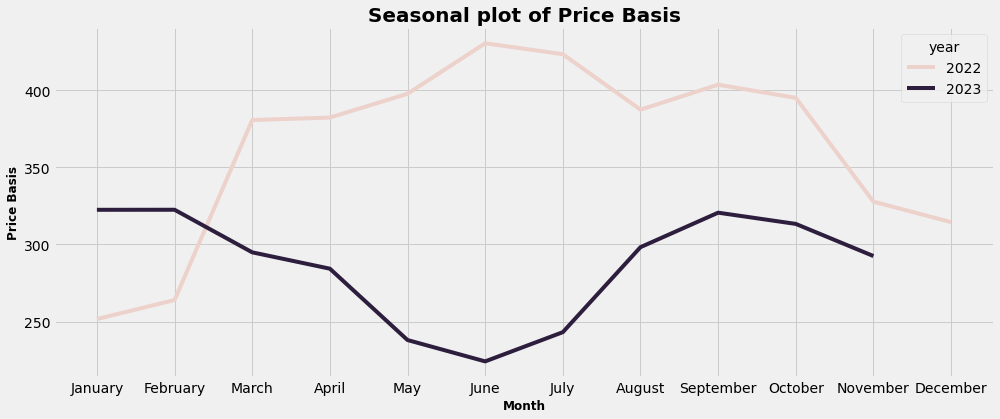

In [30]:
# variables='price_basis'
# fig,ax=plt.subplots(figsize=(15,6))
# sns.lineplot(x=df_seasonality['month'],y=df_seasonality[variables],hue=df_seasonality['year'])
# ax.set_title('Seasonal plot of Price Basis',fontsize=20,loc='center',fontdict=dict(weight='bold'))
# ax.set_xlabel('Month',fontsize=12,fontdict=dict(weight='bold'))
# ax.set_ylabel('Price Basis',fontsize=12,fontdict=dict(weight='bold'))

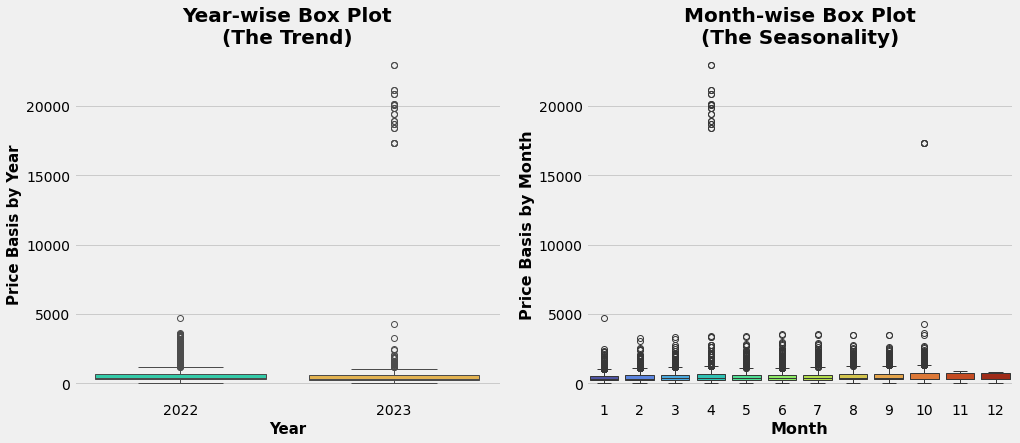

In [31]:
# plot_box_seasonality(df,'year',variables,'month_number')

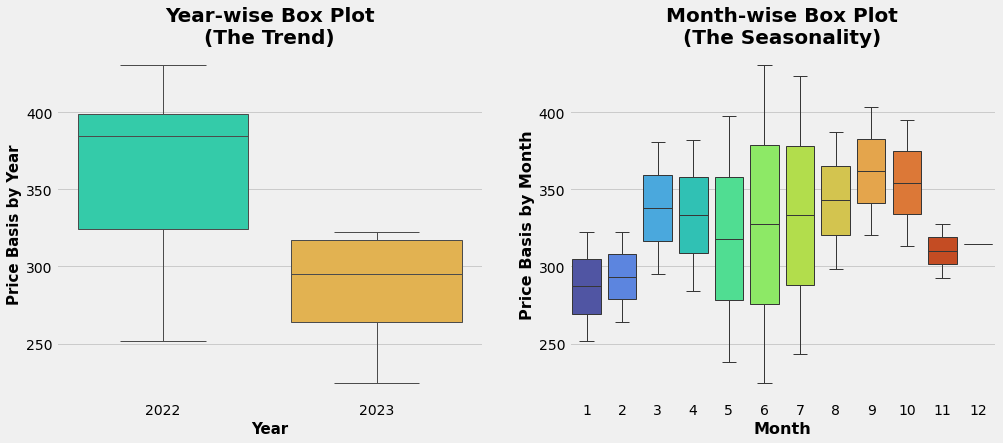

In [226]:
# plot_box_seasonality(df_seasonality,'year',variables,'month_number')

In [25]:
# fig=go.Figure(data=go.Histogram(x=df.loc[df.price_basis<1500,'price_basis']))
# fig.show('iframe')